In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistics
from evaluation.classification.statistics import compute_all_size_df, get_precisions
plt.style.use("ggplot")
%matplotlib inline

### --- compare accuracy per class ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_resize_fix_aspect_ratio = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/validation_matrix.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_resize_crossvalid/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_resize_fix_aspect_ratio_precisions = get_precisions(resnet50_resize_fix_aspect_ratio)
resnet50_resize_precisions = get_precisions(resnet50_resize)

In [4]:
exp_name = ["resnet50", "resnet50_resize_fix_aspect_ratio", "resnet50_resize"]
exp_ap = [resnet50_precisions.mean(), resnet50_resize_fix_aspect_ratio_precisions.mean(), resnet50_resize_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50,0.878885
1,resnet50_resize_fix_aspect_ratio,0.901115
2,resnet50_resize,0.889117


In [6]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, "resnet50_resize_fix_aspect_ratio": resnet50_resize_fix_aspect_ratio_precisions, "resnet50_resize": resnet50_resize_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label

,resnet50,resnet50_resize_fix_aspect_ratio,resnet50_resize,Name
0,0.926471,0.960784,0.928922,Diptera
1,0.960784,0.941176,0.960784,Ephemeridae
2,0.764045,0.820225,0.752809,Ephemeroptera
3,0.887640,0.932584,0.880150,Lepidoptera
4,0.823077,0.876923,0.884615,Plecoptera
5,0.911290,0.875000,0.927419,Trichoptera


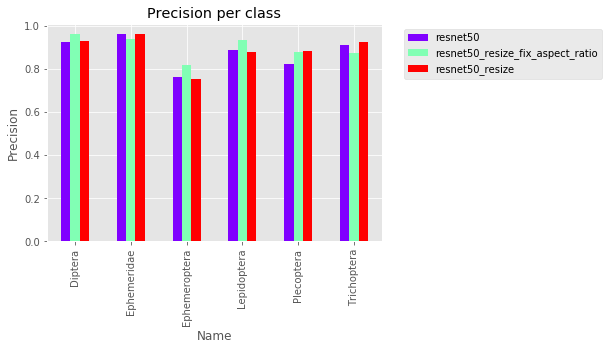

In [8]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50", "resnet50_resize_fix_aspect_ratio", "resnet50_resize"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy per size ---

In [9]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
resnet50_resize_fix_aspect_ratio = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/each_size_df.csv')
resnet50_resize  = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_resize_crossvalid/each_size_df.csv')
new_resnet50_resize_fix_aspect_ratio = pd.DataFrame({"Accuracy": resnet50_resize_fix_aspect_ratio["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
new_resnet50_resize = pd.DataFrame({"Accuracy": resnet50_resize["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
resnet50_resize_fix_aspect_ratio = compute_all_size_df(new_resnet50_resize_fix_aspect_ratio)
resnet50_resize = compute_all_size_df(new_resnet50_resize)
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')

In [12]:
resnet50 = resnet50.drop(resnet50.index[[0]])
resnet50_resize_fix_aspect_ratio = resnet50_resize_fix_aspect_ratio.drop(resnet50_resize_fix_aspect_ratio.index[[0]])
resnet50_resize = resnet50_resize.drop(resnet50_resize.index[[0]])

In [13]:
all_df = resnet50
all_df = all_df.rename(columns={'Accuracy': 'resnet50'})
all_df = all_df.assign(resnet50_resize_fix_aspect_ratio=resnet50_resize_fix_aspect_ratio["Accuracy"])
all_df = all_df.assign(resnet50_resize=resnet50_resize["Accuracy"])
all_df

,Unnamed: 0,order,resnet50,Insect_size,resnet50_resize_fix_aspect_ratio,resnet50_resize
1,1,7.0,1.000000,208.900000,1.000000,0.800000
2,2,8.0,0.883721,400.651163,0.906977,0.860465
3,3,9.0,0.761468,778.706422,0.779817,0.752294
4,4,10.0,0.812227,1510.864629,0.860262,0.838428
5,5,11.0,0.855634,2949.616197,0.890845,0.894366
6,6,12.0,0.932039,5938.822006,0.961165,0.928803
7,7,13.0,0.971292,11264.789474,0.971292,0.956938
8,8,14.0,0.948718,22344.653846,0.948718,0.935897
9,9,15.0,0.800000,34865.400000,0.800000,0.900000


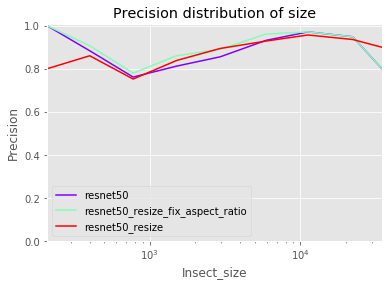

In [14]:
all_df.plot(x="Insect_size", y=["resnet50", "resnet50_resize_fix_aspect_ratio", "resnet50_resize"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_distrib_of_size.png", bbox_inches="tight")